### Gradiente estocástico descendiente
#### Equipo No. 6: Elena Villalobos Nolasco, Carolina Acosta Tovany y Aide Jazmín González Cruz

#### 1.- Se importan los paquetes

In [1]:
import random
import matplotlib.pyplot as plt
import csv
from math import exp
import numpy as np
import pandas as pd

import matplotlib.animation as animation

from sklearn.datasets import load_iris
from matplotlib import rc

#### 2.- Cargamos los datos

In [2]:
def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

data = load_data("iris_num.txt",None)
data = np.array(data)

#### 3.- Definimos nuestra función costo/objetivo (LOSS Function)

$J(\theta) = \frac{1}{n} \sum_{i=1}^{n} L_h (y^{(i)}\theta * x^{(i)}) + \frac{\lambda}{2} || \theta || ^2$

$ L_h (v) = \begin{bmatrix}
1 -v \:\:\:\:\:  v < 1\\
0 \:\:\:\:\: otro\:caso
\end{bmatrix}$

In [3]:
def costo(data, n, theta, lamb):
    def Lh(theta,x,y):  # De acuerdo a la clase:
        v = np.dot(theta,x.T)*y
        if (v)<1:
            return 1 - v
        else:
            return 0
    
    costo = 0
    
    for i in data:
        x = i[:len(i)-1]
        y = i[4]
        
        costo += Lh(theta,x,y)+((lamb/2)*np.linalg.norm(theta)**2)
    
    costo *= 1/n
    
    return costo

#### 4.- Definimos la función SGD.

Para $i \in {1,...,n}$ aleatoria:

$\theta \leftarrow \theta-\eta_t \Delta_{\theta} \left[ Loss_h (y^{(i)} \theta  * x^{(i)}) + \frac{\lambda}{2} ||\theta||^2 \right] $


Y de acuerdo a la clase:


$ L_h^{'} (v) = \begin{bmatrix}
-1 \:\:\:\:\:  v < 1\\
0 \:\:\:\:\: otro\:caso
\end{bmatrix}$


$\theta^t \leftarrow \theta^{t+1}-\eta_t L_h^{'} (v) + \lambda \theta$

In [27]:
def sgd(train_data,theta,lamb,iteraciones):
    slope = []
    x = np.array(train_data[:,0:4])
    y = np.array(train_data[4])
    y_len = len(y) # 
    
    def f_perdida(theta,x,y):  # De acuerdo a la clase:
        if (np.dot(theta,x.T)*y)<1:
            return -1
        else:
            return 0
    
    for j in range(iteraciones):
        random.seed(1993)
        rand_int = np.random.randint(0,y_len) # elige el dato al azar entre cero y y_len
        x_i=x[rand_int,:].reshape(1,x.shape[1])
        y_i=y[rand_int].reshape(1,1)
        theta=theta-(1/(j+1))*y_i@x_i*(f_perdida(theta,x_i,y_i)+(lamb)*theta)
        #print(theta[0])
        slope.append(theta[0])
        #theta=theta-(1/(j+1))*y_i@x_i*(f_perdida(theta,x_i,y_i)+(lamb/2)*np.linalg.norm(theta)**2)
        
    return theta,slope

#### 5.- Definimos la función CrossValidation

In [5]:
random.seed(1993)

def CrossValidation(data,K):
    lamda_list = [100,10,1,0.01,0.001]
    iteraciones = 1000
    df_lamda = pd.DataFrame(0.0, index=range(1),columns=("100","10","1","0.01","0.001"))
    
    # Dividimos los datos en chunk de igual tamaño
    chunks = np.array_split(data, K)
    for lamda_ in lamda_list:
        error = 0.0
        for i in range(1,int(K)):
            
            # Inicializamos las tetas
            theta = np.array([0.0, 0.0, 0.0, 0.0])
            
            # El chunk i será nuestro bloque de datos de prueba
            test_data = chunks[i]
            
            # Entrenamos con todos los otros datos menos con el chunk[i]
            train_data = chunks.copy()
            train_data.pop(i) # Elimina el chunk i
            train_data = np.concatenate(train_data)
        
            
            theta_est = sgd(train_data, theta, lamda_, iteraciones)
            
            
            #  Obtenemos el error con la función objetivo
            error += costo(test_data,len(test_data), theta_est[0],lamda_)
        error /= K
        
        df_lamda[str(lamda_)][0] = error
        
    print(df_lamda)
    return (df_lamda.idxmin(axis=1)[0])


#### 6.- Hacemos la validación cruzada sobre nuestra data

In [6]:
df_lamda = CrossValidation(data,5.0)
float(df_lamda)

             100        10         1     0.01     0.001
0  6.816672e+228  0.778169  0.691699  0.94433  0.714883


1.0

#### Conclusión:

De acuerdo al CrossValidation , debemos utilizar lambda 0.001 para obtener mejor resultados, porque tendrá menor error segun la funcion de costo. 

Estamos haciendo 1000 iteraciones.

#### 7.- Volvemos a entrenar

In [7]:
#Se revuelven los datos
random.seed(1992)
random.shuffle(data)

In [8]:
#Datos de entrenamiento
datos_entrenamiento = data[0:120]

In [9]:
#Datos de verificación
data_validacion = data[121:150]

In [47]:
theta = np.array([0.0, 0.0, 0.0, 0.0])
iteraciones = 100
lam = 1

In [48]:
theta_est = sgd(data_validacion, theta, lam, iteraciones)
print("Theta : ", theta_est[0])
slope = theta_est[1]

Theta :  [[0.06476856 0.08788199 0.02839977 0.0150628 ]]


In [49]:
len(slope)

100

In [52]:
def animacs(slope,data):
    X = np.array(data[:,0:4])
    Y = np.array(data[:,4])
    
    fig, ax = plt.subplots()

    line, = ax.plot([],[],'k-')

    ax.scatter(X[Y==0,0],X[Y==0,3],c='b',label='no setosa')
    ax.scatter(X[Y==1,0],X[Y==1,3],c='r',label='setosa')
    ax.legend(loc='lower right')

    ax.set_xlabel('sepal length (cm)')
    ax.set_ylabel('Petal width (cm)')

    ax.set_xlim(4,6)
    ax.set_ylim(0,2)
    x = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],200)

    ax.grid(True)

    def anima(i):
        y =slope[i][0]*x 
        line.set_data(x,y)
        return line,
    animacion = animation.FuncAnimation(fig, anima, frames = len(slope),interval=200,blit=True)
    
    return animacion
    


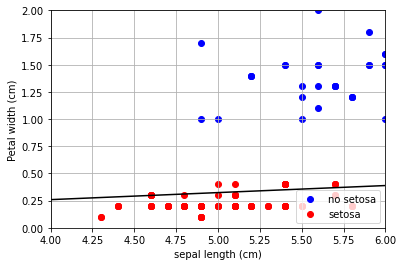

In [53]:
anim = animacs(slope,data)

rc('animation',html='jshtml')
anim